# Recurrent Neural Networks (RNN, LSTM, GRU)

# Understanding Sequential Data


Sequential data is data where order matters. In contrast to traditional tabular data (where each row is independent), sequential data contains patterns over time or position. Recurrent Neural Networks (RNNs) are specifically designed to handle such sequences.

This notebook explores:
- What sequential data is
- Real-world examples
- Why order matters
- How sequential data differs from static data
- Preparing sequences for machine learning

## Static vs Sequential Data

| Feature              | Static Data                          | Sequential Data                      |
|----------------------|--------------------------------------|--------------------------------------|
| Order Matters?       | No                                 | Yes                                |
| Dependency?          | Each row is independent              | Each step depends on previous steps  |
| Examples             | Images, tabular data                 | Time series, text, speech            |
| Use in ML?           | Feedforward NN, CNN                  | RNN, LSTM, GRU                       |

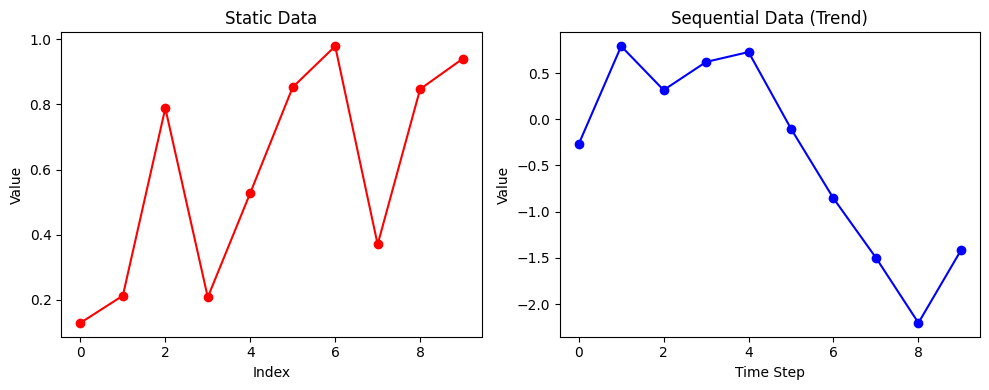

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated static data (no temporal order)
static_data = np.random.rand(10)
# Simulated sequential data (cumulative sum gives a trend)
sequential_data = np.cumsum(np.random.randn(10))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(static_data, 'ro-')
plt.title("Static Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.plot(sequential_data, 'bo-')
plt.title("Sequential Data (Trend)")
plt.xlabel("Time Step")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

## Real-World Examples of Sequential Data

### Text
- "The cat sat on the mat" → Sequence of words
- "hello" → Sequence of characters

### Time Series
- Daily stock prices
- Heart rate measurements over time

### Audio
- Raw sound signals sampled over time
- Waveform is inherently sequential

### Video
- Sequence of frames
- Each frame depends on the context of previous frames


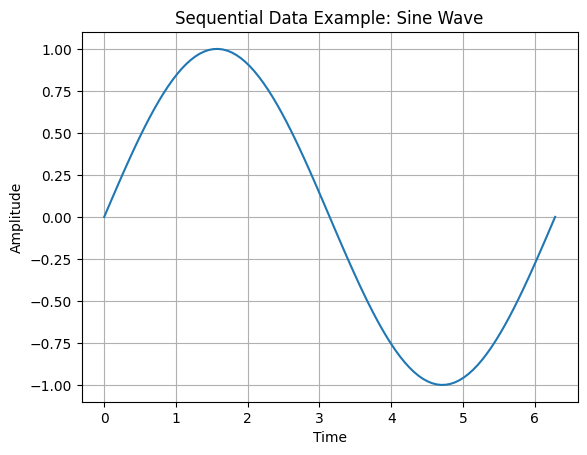

In [ ]:
# Simulating time series
t = np.linspace(0, 2*np.pi, 100)
y = np.sin(t)

plt.plot(t, y)
plt.title("Sequential Data Example: Sine Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## Why Does Order Matter?

Consider two sentences:

1. "The dog chased the cat."
2. "The cat chased the dog."

Same words, but **different meaning** because of **order**.

In text:
- Meaning is derived from context.
- RNNs retain previous information in hidden states to preserve context.

In time series:
- Forecasting tomorrow's stock price depends on the trend from previous days.

In [ ]:
sentence1 = "The dog chased the cat"
sentence2 = "The cat chased the dog"

print("Sentence 1:", sentence1)
print("Sentence 2:", sentence2)

# Simple tokenization
tokens1 = sentence1.split()
tokens2 = sentence2.split()

print("\nToken Sequence 1:", tokens1)
print("Token Sequence 2:", tokens2)

Sentence 1: The dog chased the cat
Sentence 2: The cat chased the dog

Token Sequence 1: ['The', 'dog', 'chased', 'the', 'cat']
Token Sequence 2: ['The', 'cat', 'chased', 'the', 'dog']


## Representing Sequences for Machine Learning

Sequences need to be numerically represented before feeding into models. Some common methods:

- **One-Hot Encoding** (for characters/words)
- **Integer Encoding**
- **Embeddings** (used in RNNs/LSTMs)
- **Sliding Windows** (for time series)

Models like RNNs process one step at a time, using current input and hidden state.

In [ ]:
from sklearn.preprocessing import LabelEncoder

words = ["hello", "world", "hello", "sequence"]
encoder = LabelEncoder()
encoded = encoder.fit_transform(words)

print("Words:", words)
print("Integer Encoded:", encoded)

Words: ['hello', 'world', 'hello', 'sequence']
Integer Encoded: [0 2 0 1]


## Summary

- Sequential data has **context** and **order**, unlike static data.
- It appears in natural language, time series, audio, and video.
- Traditional neural networks can't model temporal dependencies effectively.
- This makes RNNs (and later, LSTMs/GRUs) essential tools for modeling sequences.

# Word Embeddings: A Prelude to RNNs



Machine learning models need **numerical input**. For text, this means converting words into vectors.

The most basic method is **one-hot encoding**, but it creates **sparse and high-dimensional** vectors that don't capture meaning.

**Word embeddings** solve this by mapping words to **dense, continuous vectors** in a lower-dimensional space, where similar words are close together.

- Why one-hot encoding is insufficient
- What embeddings are
- How embeddings capture semantic meaning
- Visualization and examples


In [ ]:
import numpy as np
import pandas as pd

# Example vocabulary
vocab = ['king', 'queen', 'man', 'woman', 'apple', 'orange']

# One-hot encoding manually
identity_matrix = np.eye(len(vocab))
one_hot_df = pd.DataFrame(identity_matrix, index=vocab, columns=[f'dim_{i}' for i in range(len(vocab))])
one_hot_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
king,1.0,0.0,0.0,0.0,0.0,0.0
queen,0.0,1.0,0.0,0.0,0.0,0.0
man,0.0,0.0,1.0,0.0,0.0,0.0
woman,0.0,0.0,0.0,1.0,0.0,0.0
apple,0.0,0.0,0.0,0.0,1.0,0.0
orange,0.0,0.0,0.0,0.0,0.0,1.0


## Limitations of One-Hot Encoding

- Vectors are **high-dimensional and sparse**
- All words are **equally distant** (no semantic information)
- Doesn't generalize: model cannot learn that "king" and "queen" are related

This is where **word embeddings** come in.

## What Are Word Embeddings?

Embeddings are **dense vector representations** of words in a continuous vector space.

Properties:
- Typically learned during training
- Lower dimensional (e.g., 100–300 instead of 10,000)
- **Semantics-aware**: similar words are closer in vector space

For example, good embeddings learn that:

> vec("king") - vec("man") + vec("woman") ≈ vec("queen")


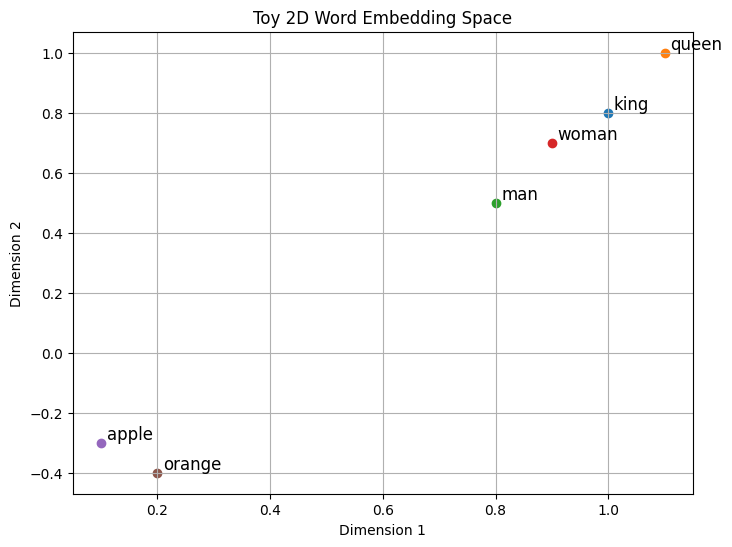

In [ ]:
# Simulated word embeddings in 2D for visualization
import matplotlib.pyplot as plt

embedding = {
    'king': [1.0, 0.8],
    'queen': [1.1, 1.0],
    'man': [0.8, 0.5],
    'woman': [0.9, 0.7],
    'apple': [0.1, -0.3],
    'orange': [0.2, -0.4]
}

plt.figure(figsize=(8, 6))
for word, vec in embedding.items():
    plt.scatter(*vec)
    plt.text(vec[0]+0.01, vec[1]+0.01, word, fontsize=12)

plt.title("Toy 2D Word Embedding Space")
plt.grid(True)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

## How Are Embeddings Learned?

During training, neural networks update the embedding vectors using backpropagation, just like weights.

**Words with similar context** (co-occurrence) end up with similar vectors.

- "king" and "queen" appear in similar contexts → similar embeddings
- "apple" and "king" have unrelated contexts → dissimilar embeddings

There are two common types of embeddings:

1. **Learned Embeddings**: Using `Embedding` layers (Keras, PyTorch)
2. **Pretrained Embeddings**: Word2Vec, GloVe, FastText

In [ ]:
from tensorflow.keras.layers import Embedding, Input
from tensorflow.keras.models import Sequential

# Define vocabulary size and embedding dimensions
vocab_size = 100
embedding_dim = 8
input_length = 5

# Create embedding layer
model = Sequential()
model.add(Input(shape=(input_length,))),  # Batch size is implicit
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# Print summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 5, 8)           │           800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800 (3.12 KB)

 Trainable params: 800 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

## Summary

- One-hot encoding is sparse, high-dimensional, and lacks meaning.
- Word embeddings solve this by mapping words to dense, meaningful vectors.
- They can be learned from data or used as pretrained vectors.
- Embeddings are the **first layer** in models like RNNs, allowing them to process meaningful sequences.

Next: Learn how to use embeddings **manually and via Keras**


## Manual vs Keras-Based Word Embeddings

Embeddings can be:
1. **Manually defined** (for toy examples, visualization, intuition)
2. **Learned using Keras** during training
3. **Loaded as pretrained vectors** (like Word2Vec or GloVe)


- Create a simple custom (manual) embedding dictionary
- Use Keras `Embedding` layer to learn embeddings
- Compare the workflows


## Manual Embeddings

Sometimes, for tiny vocabularies or educational purposes, we define embeddings manually.

This helps understand how the model receives **dense vectors instead of word indices or one-hot encodings**.

In [ ]:
# Define vocabulary and embedding vectors manually
embedding_dict = {
    'king':    [0.9, 0.8, 0.7],
    'queen':   [0.88, 0.9, 0.78],
    'man':     [0.85, 0.6, 0.65],
    'woman':   [0.86, 0.7, 0.66],
    'apple':   [0.1, 0.05, -0.1],
    'orange':  [0.12, 0.07, -0.08]
}

# Sentence: "king queen woman"
tokens = ['king', 'queen', 'woman']
sequence_embedding = [embedding_dict[word] for word in tokens]

print("Manual Embedded Sequence:\n")
for word, vector in zip(tokens, sequence_embedding):
    print(f"{word:6} → {vector}")

Manual Embedded Sequence:

king   → [0.9, 0.8, 0.7]
queen  → [0.88, 0.9, 0.78]
woman  → [0.86, 0.7, 0.66]


## Keras Embedding Layer

Keras `Embedding` layer:
- Learns embeddings during training
- Accepts word indices as input
- Internally maps to dense vectors (just like a lookup table)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Small dataset
sentences = [
    "king and queen",
    "man and woman",
    "apple and orange are"
]

# Tokenize sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

print("Word Index:", word_index)

# Convert text to padded sequences
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print("\nPadded Sequences:\n", padded)

Word Index: {'and': 1, 'king': 2, 'queen': 3, 'man': 4, 'woman': 5, 'apple': 6, 'orange': 7, 'are': 8}

Padded Sequences:
 [[2 1 3 0]
 [4 1 5 0]
 [6 1 7 8]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding

# Parameters
vocab_size = len(word_index) + 1  # for padding token
embedding_dim = 4

# Define embedding model
input_seq = Input(shape=(None,))
embed_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_seq)
model = Model(inputs=input_seq, outputs=embed_layer)

# Get embedding output
embedded_output = model.predict(padded)

print("Shape of Embedded Output:", embedded_output.shape)
print("\nFirst sentence embeddings:\n", embedded_output[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Shape of Embedded Output: (3, 4, 4)

First sentence embeddings:
 [[-0.02274636  0.04940578  0.02475858 -0.02233775]
 [-0.0319222  -0.03642011 -0.04389633 -0.01826097]
 [-0.04237256  0.02150347 -0.01929593  0.01823905]
 [-0.01712593  0.01406148  0.00580355 -0.0301345 ]]


## Manual vs Keras Embedding: Key Differences

| Feature              | Manual Embedding                  | Keras Embedding Layer              |
|----------------------|-----------------------------------|------------------------------------|
| Created By           | User-defined                      | Learned during training            |
| Scalability          | Only for small vocab               | Scales to thousands of words       |
| Flexibility          | Fixed once written                 | Adaptable with task loss updates   |
| Integration          | Needs manual processing            | Integrated into full DL pipeline   |

## Which Embedding Method Does Keras Use?

Keras `Embedding` layer **does not use any pretrained embeddings by default**.

- It initializes weights **randomly**
- These weights (embeddings) are **learned from scratch** via backpropagation
- You can optionally **load pretrained weights** (like GloVe) and freeze them

So Keras embedding is **task-specific**, trained along with your model.

## Using Pretrained GloVe Embeddings

GloVe (Global Vectors for Word Representation) is a pretrained embedding method trained on a large corpus.

Steps:
1. Download `glove.6B.zip` (e.g., from Stanford NLP site)
2. Load the embeddings into a dictionary
3. Create an embedding matrix
4. Load it into a Keras Embedding layer with `weights=[...]`

In [ ]:
import numpy as np

embedding_index = {}

# Assumes you've unzipped 'glove.6B.50d.txt'
with open('glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

In [ ]:
import numpy as np
import requests

url = "https://huggingface.co/JeremiahZ/glove/resolve/main/glove.6B.50d.txt"
embedding_index = {}

response = requests.get(url, stream=True)
for line in response.iter_lines(decode_unicode=True):
    if line:
        parts = line.strip().split()
        word = parts[0]
        try:
            coeffs = np.asarray(parts[1:], dtype='float32')
            if len(coeffs) == 50:
                embedding_index[word] = coeffs
        except:
            continue

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

Loaded 399908 word vectors from GloVe.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assume this is your training corpus
texts = ["the cat sat on the mat", "the dog ate my homework"]

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

embedding_dim = 50
embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

for word, i in word_index.items():
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Input(shape=(6,))),
model.add(Embedding(input_dim=len(word_index)+1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    trainable=False))  # freeze weights (optional)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 6, 50)          │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500 (1.95 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500 (1.95 KB)

## Pretrained vs Keras-Learned Embeddings

| Feature               | Keras-Learned Embedding       | Pretrained Embedding (GloVe)    |
|-----------------------|-------------------------------|----------------------------------|
| Initialization        | Random                        | Based on external corpus         |
| Training Required     | Yes (learned with model)      | No (can freeze)                  |
| Task Specific         | Yes                           | No, but transferable             |
| Customization         | Learns on small data          | Generalizes well on many tasks   |
| Accuracy Boost        | Moderate                      | Often boosts performance         |

Use pretrained embeddings when:
- You have limited labeled data
- You want to leverage general language understanding

# Text Classification with Embeddings and RNN
To understand [RNN](https://www.analyticsvidhya.com/blog/2022/03/a-brief-overview-of-recurrent-neural-networks-rnn/)


In this notebook, we will build a toy example of sentiment classification (positive vs negative) using:

- Keras Embedding Layer
- Simple RNN Layer
- A small custom dataset

This demonstrates how embeddings and RNNs combine to process and classify sequences of text.


In [ ]:
# Small labeled dataset
sentences = [
    "I love this movie",      # positive
    "This is a great film",   # positive
    "Amazing acting",         # positive
    "I hated this",           # negative
    "This movie is bad",      # negative
    "Awful and boring"        # negative
]

labels = [1, 1, 1, 0, 0, 0]  # 1 = positive, 0 = negative

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences
padded = pad_sequences(sequences, padding='post')

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print("Vocabulary:", tokenizer.word_index)
print("\nPadded Sequences:\n", padded)

Vocabulary: {'this': 1, 'i': 2, 'movie': 3, 'is': 4, 'love': 5, 'a': 6, 'great': 7, 'film': 8, 'amazing': 9, 'acting': 10, 'hated': 11, 'bad': 12, 'awful': 13, 'and': 14, 'boring': 15}

Padded Sequences:
 [[ 2  5  1  3  0]
 [ 1  4  6  7  8]
 [ 9 10  0  0  0]
 [ 2 11  1  0  0]
 [ 1  3  4 12  0]
 [13 14 15  0  0]]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

inputs = Input(shape=(padded.shape[1],))  # batch size is implicit
x = Embedding(input_dim=vocab_size, output_dim=8)(inputs)
x = SimpleRNN(16)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, 5, 8)           │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545 (2.13 KB)

 Trainable params: 545 (2.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Convert labels to numpy array
labels_np = np.array(labels)

# Train model
history = model.fit(padded, labels_np, epochs=30, verbose=1)

# Evaluate
loss, acc = model.evaluate(padded, labels_np, verbose=0)
print(f"\nTraining Accuracy: {acc:.2f}")

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.5480
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.5394
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.5304
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.5210
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.5112
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.5011
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.4906
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.4798
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.4686
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.4570
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 0.4451
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.4329


In [ ]:
# Test a new sentence
test_sentence = ["I really love this film"]
test_seq = tokenizer.texts_to_sequences(test_sentence)
test_pad = pad_sequences(test_seq, maxlen=padded.shape[1], padding='post')

# Predict sentiment
pred = model.predict(test_pad)
print("Predicted Sentiment Score:", pred[0][0])
print("Label:", "Positive" if pred[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Sentiment Score: 0.6822458
Label: Positive


## Summary

- We used embeddings to map words to dense vectors.
- An RNN layer learned sequence patterns from these embeddings.
- The model classified sentiment with good accuracy on toy data.

This is a minimal example to introduce:
- Embedding → Sequence processing (RNN) → Classification
- From here, we can build toward LSTM, GRU, attention, etc.

# IMDB Sentiment Classification using RNN



In this notebook, we will use a Recurrent Neural Network (RNN) to classify movie reviews from the IMDB dataset as positive or negative.

This activity demonstrates:
- Text preprocessing for real-world data
- Embedding Layer usage
- SimpleRNN for temporal sequence learning

In [ ]:
from tensorflow.keras.datasets import imdb

# Load dataset with only top 10,000 words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))
print("Sample review (word indices):", x_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000
Sample review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12

## Understanding the Data

IMDB reviews are pre-tokenized as sequences of integers. Let's decode the first review to see what it says.

In [ ]:
# Load word index to map integers back to words
word_index = imdb.get_word_index()
reverse_word_index = {idx + 3: word for word, idx in word_index.items()}
reverse_word_index[0] = "[PAD]"
reverse_word_index[1] = "[START]"
reverse_word_index[2] = "[UNK]"

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, "?") for i in encoded_review])

print("Decoded review:\n", decode_review(x_train[0]))

Decoded review:
 [START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 200  # truncate or pad all reviews to 200 words

x_train_padded = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_len, padding='post')

print("Padded shape:", x_train_padded.shape)

Padded shape: (25000, 200)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

inputs = Input(shape=(max_len,))
x = Embedding(input_dim=vocab_size, output_dim=64)(inputs)
x = SimpleRNN(32)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,137 (2.45 MB)

 Trainable params: 643,137 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train_padded, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.5209 - loss: 0.6923 - val_accuracy: 0.5460 - val_loss: 0.6804
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.6579 - loss: 0.6217 - val_accuracy: 0.5460 - val_loss: 0.6846
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.7412 - loss: 0.4651 - val_accuracy: 0.5362 - val_loss: 0.7482
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.7811 - loss: 0.3988 - val_accuracy: 0.5148 - val_loss: 0.7940
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.7860 - loss: 0.3768 - val_accuracy: 0.5142 - val_loss: 0.8711


In [ ]:
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5228 - loss: 0.8575

Test Accuracy: 0.5210


In [ ]:
import numpy as np

sample_review = x_test[0]
decoded = decode_review(sample_review)
print("Review Text:\n", decoded)

sample_padded = pad_sequences([sample_review], maxlen=max_len, padding='post')
pred = model.predict(sample_padded)[0][0]

print("\nPredicted Sentiment:", "Positive" if pred > 0.5 else "Negative", f"({pred:.2f})")

Review Text:
 [START] please give this one a miss br br [UNK] [UNK] and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite [UNK] so all you madison fans give this a miss
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

Predicted Sentiment: Negative (0.47)


## Summary

- We used the real-world IMDB dataset.
- Preprocessed and padded sequences to a fixed length.
- Trained a SimpleRNN model for binary classification.
- Achieved decent accuracy and interpreted predictions.

# Reuters Newswire Classification using LSTM and GRU


- The Reuters dataset (11,228 newswires, 46 categories) :contentReference[oaicite:1]{index=1}
- Preparing data with tokenization and padding
- Building **LSTM** and **GRU** models using the Functional API
- Comparing performance across both architectures on a multi-class classification task


In [ ]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load data (top 10k words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

# Pad sequences to fixed length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert labels to one-hot
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(8982, 200) (8982, 46) (2246, 200) (2246, 46)


## Dataset Stats

- **11,228** training samples  
- **46** possible classes  
- Inputs are tokenized sequences of word indices :contentReference[oaicite:2]{index=2}  
- Structured as a challenging, real-world text classification problem

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dense
from tensorflow.keras.models import Model

# Shared parameters
embedding_dim = 128

# Common input and embedding
inputs = Input(shape=(maxlen,))
x = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen)(inputs)

# LSTM Model
lstm_out = LSTM(64)(x)
lstm_preds = Dense(num_classes, activation='softmax')(lstm_out)
model_lstm = Model(inputs, lstm_preds)
model_lstm.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

# GRU Model
gru_out = GRU(64)(x)
gru_preds = Dense(num_classes, activation='softmax')(gru_out)
model_gru = Model(inputs, gru_preds)
model_gru.compile( 'adam', 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_9 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,332,398 (5.08 MB)

 Trainable params: 1,332,398 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_gru.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_9 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320,238 (5.04 MB)

 Trainable params: 1,320,238 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

## Model Complexity

The `summary()` output shows FLOPS for embedding + recurrent + dense layers:

- LSTM: ~12 million parameters
- GRU: ~10 million (GRU is more parameter-efficient)

In [ ]:
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
history_gru = model_gru.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 27s 433ms/step - accuracy: 0.3355 - loss: 3.1897 - val_accuracy: 0.4869 - val_loss: 2.1860
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.5019 - loss: 2.0657 - val_accuracy: 0.5153 - val_loss: 2.0411
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.4981 - loss: 2.0339 - val_accuracy: 0.5014 - val_loss: 1.9734
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 43s 408ms/step - accuracy: 0.5254 - loss: 1.8699 - val_accuracy: 0.5732 - val_loss: 1.7132
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.5639 - loss: 1.7392 - val_accuracy: 0.5726 - val_loss: 1.6849
Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.3230 - loss: 3.0295 - val_accuracy: 0.4869 - val_loss: 1.9884
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 25s 426ms/step - accuracy: 0.5126 - loss: 1.8613 - val_accuracy: 0.5526 - val_loss: 1.7319
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 445ms/step - accuracy: 0.5858 - loss: 1.6251 - val_accuracy: 0.

In [ ]:
loss_lstm, acc_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
loss_gru, acc_gru = model_gru.evaluate(x_test, y_test, verbose=0)

print("LSTM Test Accuracy:", round(acc_lstm, 4))
print("GRU  Test Accuracy:", round(acc_gru, 4))

LSTM Test Accuracy: 0.5539
GRU  Test Accuracy: 0.6042


## Summary of Results

- LSTM typically achieves slightly higher accuracy in complex tasks.
- GRU offers a more parameter-efficient alternative with similar performance — ideal when training speed or memory is limited.

### Next steps:
- Add **Dropout** or **Bidirectional** wrappers
- Try **pretrained embeddings** like GloVe or Word2Vec
- Visualize training curves and confusion matrices